In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve, validation_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm, naive_bayes, metrics
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from nltk.stem import LancasterStemmer
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split as ttsplit
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/PhanLoaiEmailRac/mail_data.csv")
message_X = df.iloc[:,1]
labels_Y =df.iloc[:,0]

Mounted at /content/drive


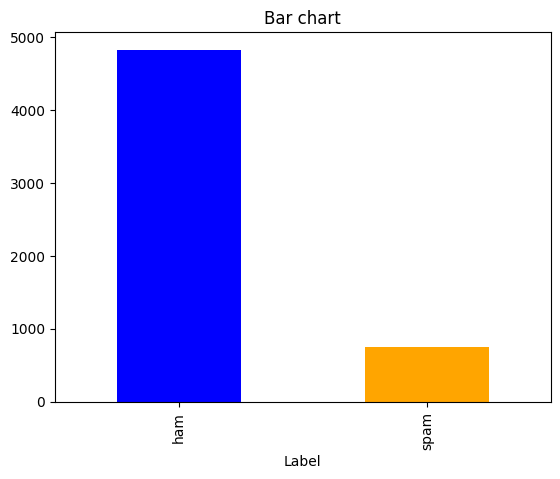

In [ ]:
count_Class=pd.value_counts(df["Label"], sort = True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [ ]:
lstem = LancasterStemmer()
def mess(messages):
  message_x = []
  for me_x in messages:
    me_x=''.join(filter(lambda mes:(mes.isalpha() or mes==" ") ,me_x))
    words = word_tokenize(me_x)
    message_x+=[' '.join([lstem.stem(word) for word in words])]
  return message_x

In [ ]:
message_x = mess(message_X)
tfvec=TfidfVectorizer(stop_words='english')
x_new=tfvec.fit_transform(message_x).toarray()

In [ ]:
y_new = np.array(labels_Y.replace(to_replace=['ham', 'spam'], value=[0, 1]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/10
28/28 [==============================] - 7s 138ms/step - loss: 0.4267 - accuracy: 0.8508 - val_loss: 0.2526 - val_accuracy: 0.8655
Epoch 2/10
28/28 [==============================] - 2s 75ms/step - loss: 0.1886 - accuracy: 0.8654 - val_loss: 0.1778 - val_accuracy: 0.8655
Epoch 3/10
28/28 [==============================] - 2s 80ms/step - loss: 0.1317 - accuracy: 0.8937 - val_loss: 0.1588 - val_accuracy: 0.9507
Epoch 4/10
28/28 [==============================] - 2s 81ms/step - loss: 0.1017 - accuracy: 0.9798 - val_loss: 0.1371 - val_accuracy: 0.9697
Epoch 5/10
28/28 [==============================] - 3s 111ms/step - loss: 0.0560 - accuracy: 0.9938 - val_loss: 0.1017 - val_accuracy: 0.9753
Epoch 6/10
28/28 [==============================] - 3s 117ms/step - loss: 0.0200 - accuracy: 0.9966 - val_loss: 0.1031 - val_accuracy: 0.9765
Epoch 7/10
28/28 [==============================] - 2s 76ms/step - loss: 0.0101 - accuracy: 0.9986 - val_loss: 0.1137 - val_accuracy: 0.9776
Epoch 8/10

In [ ]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
print('Accuracy : {:.2f}%'.format(Accuracy * 100))
print('Precision : {:.2f}%'.format(Precision * 100))
print('Recall : {:.2f}%'.format(Recall * 100))
print('F1_Score : {:.2f}%'.format(F1_Score * 100))

35/35 [==============================] - 1s 12ms/step
Accuracy : 16.77%
Precision : 13.54%
Recall : 98.64%
F1_Score : 23.81%


Confusion Matrix is : 
 [[ 42 926]
 [  2 145]]


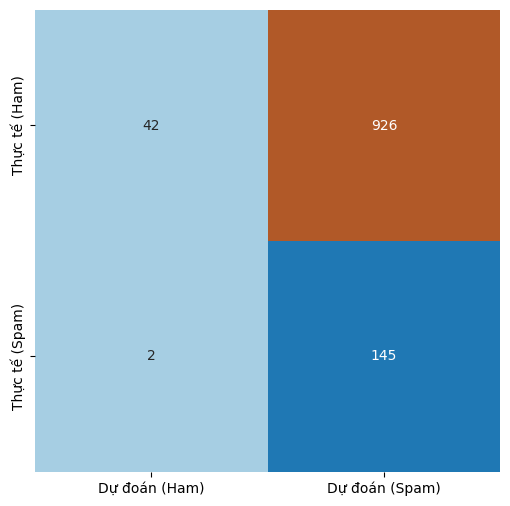

In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, y_pred)
pd.DataFrame(data=m_confusion_test, columns=['Dự Đoán (Ham)', 'Dự Đoán (Spam)'],
             index=['Thực tế (Ham)', 'Thực tế (Spam)'])
cmat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', cmat)
plt.figure(figsize=(6, 6))
sns.heatmap(cmat, annot=True, cmap='Paired', cbar=False, fmt="d",
            xticklabels=['Dự đoán (Ham)', 'Dự đoán (Spam)'], yticklabels=['Thực tế (Ham)', 'Thực tế (Spam)'])
plt.show()

In [ ]:
#Su dung cac model de phan loai
#classifier = svm.SVC(kernel='linear')
#classifier = LogisticRegression()
classifier = MultinomialNB()
#scores = cross_val_score(classifier, x_train, y_train, cv=5)
#print("cross-validation accuracy: ", scores.mean(), "+/-", scores.std())
classifier.fit(x_train,y_train)

MultinomialNB()

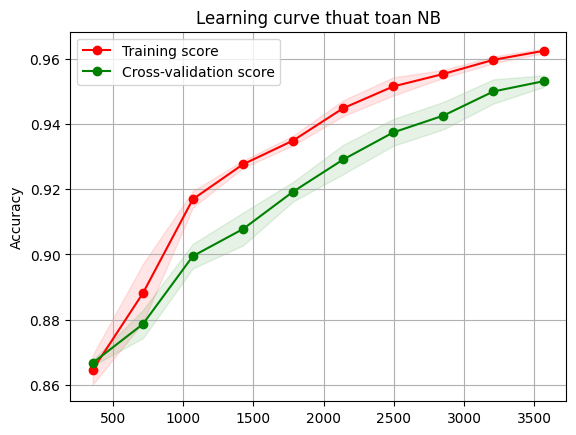

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, val_scores = learning_curve(classifier, x_train, y_train, train_sizes=train_sizes, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.title('Learning curve thuat toan NB')
plt.ylabel("Accuracy")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [ ]:
Accuracy = accuracy_score(y_test, classifier.predict(x_test))
Precision = precision_score(y_test, classifier.predict(x_test))
Recall = recall_score(y_test, classifier.predict(x_test))
F1_Score = f1_score(y_test, classifier.predict(x_test))
print('Accuracy : {:.2f}%'.format(Accuracy*100))
print('Precision : {:.2f}%'.format(Precision*100))
print('Recall : {:.2f}%'.format(Recall*100))
print('F1_Score : {:.2f}%'.format(F1_Score*100))

Accuracy : 95.96%
Precision : 100.00%
Recall : 69.39%
F1_Score : 81.93%


In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, classifier.predict(x_test))
pd.DataFrame(data = m_confusion_test, columns = ['Dự Đoán (Ham)', 'Dự Đoán (Spam)'],
             index = ['Thực tế (Ham)', 'Thực tế (Spam)'])

,Dự Đoán (Ham),Dự Đoán (Spam)
Thực tế (Ham),968,0
Thực tế (Spam),45,102


Confusion Matrix is : 
 [[968   0]
 [ 45 102]]


<Axes: >

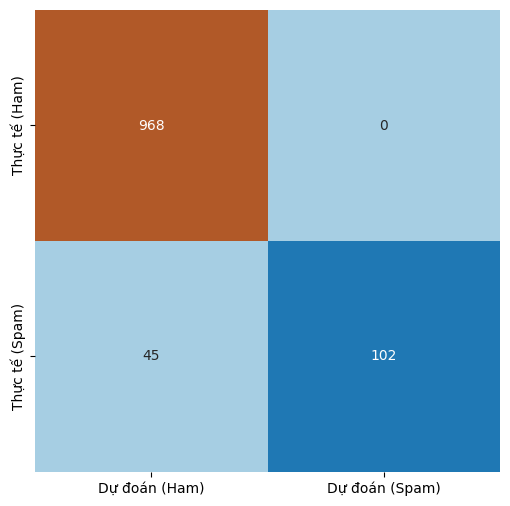

In [ ]:
cmat = confusion_matrix(y_test, classifier.predict(x_test))
print('Confusion Matrix is : \n', cmat)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d",
            xticklabels=['Dự đoán (Ham)', 'Dự đoán (Spam)'], yticklabels=['Thực tế (Ham)', 'Thực tế (Spam)'])